# Homework 3 - Logistic Regression

# COSC 3337 -  Dr. Rizk

### __About The Data__

The data we'll be using has the following attributes related to heart disease. It's different than the previous HW in terms of data:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: female or male (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death: if the patient died during the follow-up period (boolean) 

For each ```boolean``` variable, a value of 1 = True and 0 = False. For sex, female = 0 and male = 1.


### __Problem Statement__

Remember, data science tasks usually involve some sort of stakeholder who wants to learn something from the data, but don't know what to do. That's where you, the data scientist, come in! As part of a consultant group, you are a data scientist who has been contracted by a research team of cardiologists to try and better understand their group of patients. Specifically, they would like for you to:

- Predict patient survival

In this assignment, we will be using Logistic Regression to try and predict heart disease.

__Notes__

** For the homework assignments, we want you to not only use the tools given in class, but also to be able to _interpret_ the results. There are subjective questions, and the grading will be weighted not necessarily on your conclusion, but how you support your conclusion. To do this, you will need to conceptually understand the methods given in class in order to explain results.

** As a tip, remember that if you're struggling to understand a function or how to use it, each of these packages has documentation on its website that explains exactly how to use it with examples. Google is your friend :)

** Also, when trying to mimic our results, yours does not need to look exactly like the one given, as long as it is readable __and__ answers the question convincingly. Adding comments to code with "#" helps us to understand what you did or were trying to do.

** Please turn in a Jupyter notebook containing your code, its output, and your answers with the file name: 

LASTNAME_FIRSTNAME_3337_HW3.ipynb

If you submit a zip file or anything else, you will receive -5 points.

### __Part 1. Importing Libraries__

Begin by importing the necessary libraries that you'll be using.

Remember, libraries/packages are groups of functions and classes that don't come standard with Python. We are importing these packages so that we can use already-made functions, instead of having to create our own. 

In [489]:
# Data Cleaning and Plotting Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# Data Analysis Libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay

# Sets parameters for the entire notebook for Seaborn/Matplotlib plots
rcParams['figure.figsize'] = 10, 7
rcParams.update({'font.size': 12})
sns.set_style('darkgrid')

# Turns off warnings
import warnings
warnings.filterwarnings("ignore")

# If the above codeblock doesn't run, make sure you have each of
# of the packages installed and you are running Python 3.0 or greater

Let's take a look at our data

In [490]:
### Put code here to mimic the below output
df = pd.read_csv('data_hw3.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [491]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Part 1: Visual Analysis

__Q1:__ How many patients are there?

In [492]:
df.shape

(299, 13)

- There are 299 patients.

By now, you've had lots of experience with doing plots in Seaborn and Matplotlib. So for the visual analysis, you have a little bit more leash. Create __5__ or more unique plots that help you to explore and understand the data, whether that be analyzing a specific column or comparing different columns. More analysis usually results in extra points. If your answers or analysis are clearly an attempt at an easy answer or just stating what methods you used, you __will__ lose points. Remember, most of the points in the HW assignments come from your interpretation, not just copy and pasting code.

In [493]:
df["death"].value_counts()

0    203
1     96
Name: death, dtype: int64

=> We can see that we have 203 patients that are "healthy" and 96 patients that had heart disease.

- _Histogram_

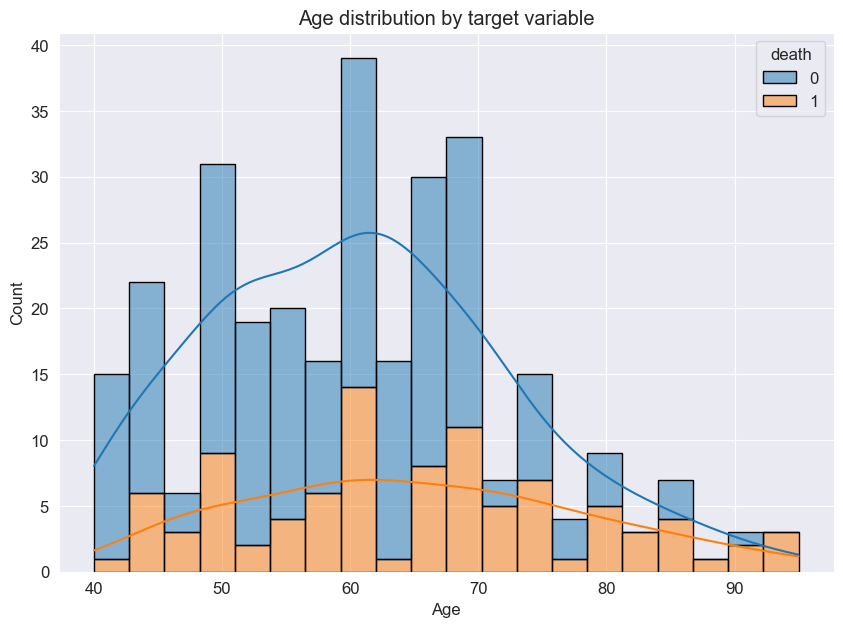

In [494]:
# sns.histplot(df["age"], bins=20, edgecolor='black', kde=True)
# plt.xlabel("Age")
# plt.ylabel("Frequency")
# plt.title("Distribution of Age")
# plt.show()

sns.histplot(data=df, x='age', hue='death', bins=20, edgecolor='black', kde=True, multiple='stack')
plt.xlabel("Age")
plt.title('Age distribution by target variable')
plt.show()

- It shows that the average age of patients in the dataset is around 60-70 years old. Since we have more `healthy` patients than `death` patients, we can see the difference between them in the chart above.

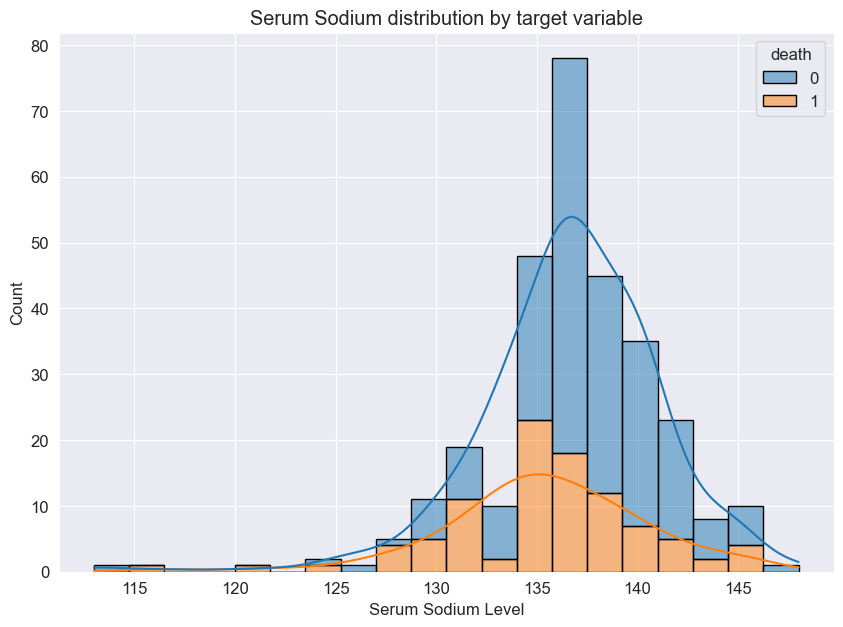

In [495]:
sns.histplot(data=df, x='serum_sodium', hue='death', edgecolor='black', kde=True, multiple='stack')
plt.xlabel("Serum Sodium Level")
plt.title('Serum Sodium distribution by target variable')
plt.show()

- The same thing can be applied to this chart (with Serum Sodium Level). The majority of Serum Sodium Level is from 130 - 145

- _Bar chart_

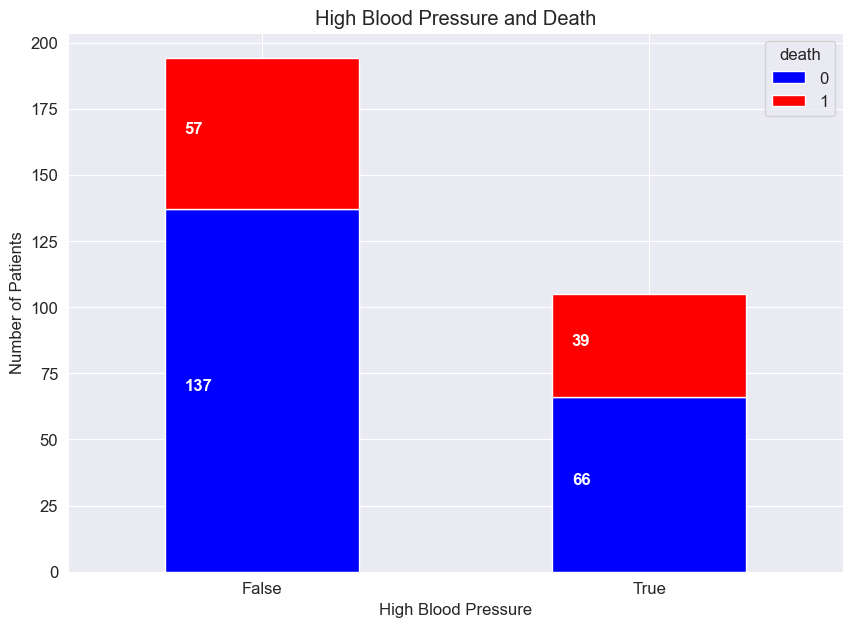

In [496]:
# # Count the number of patients with and without high blood pressure
# counts = df["high_blood_pressure"].value_counts()
# # counts

# # Create a bar chart of the counts
# plt.bar(counts.index, counts.values, color=["blue", "red"])
# plt.xticks([0, 1], ["No", "Yes"])
# plt.xlabel("High Blood Pressure")
# plt.ylabel("Number of Patients")
# plt.title("High Blood Pressure")

# for i, count in enumerate(counts):
#     plt.text(i, count+5, str(count), ha="center", va="top")
    
# plt.show()

# Count the number of patients who have and who do not have high blood pressure and who died and who survived during the follow-up period
counts = df.groupby(["high_blood_pressure", "death"])["death"].count().unstack()

# Create a stacked bar chart of the counts
ax = counts.plot(kind="bar", stacked=True, color=["blue", "red"])

# Add axis labels and title
plt.xticks([0, 1], ["False", "True"], rotation=0)
plt.xlabel("High Blood Pressure")
plt.ylabel("Number of Patients")
plt.title("High Blood Pressure and Death")
for i, v1 in enumerate(counts.iloc[:, 0]):
    ax.text(i - 0.2, v1 / 2, str(v1), color='white', fontweight='bold')
    ax.text(i - 0.2, v1 + counts.iloc[i, 1] / 2, str(counts.iloc[i, 1]), color='white', fontweight='bold')
plt.show()

- We can see that if the patients don't have high blood pressure, there're 57 out of 194 patients is `death`. So the percentage is around __29%__. While in the other hand, the percentage of `death` patients if they had high blood pressure is around __37%__. We can see that how high blood pressure can affect the chance of getting heart disease.

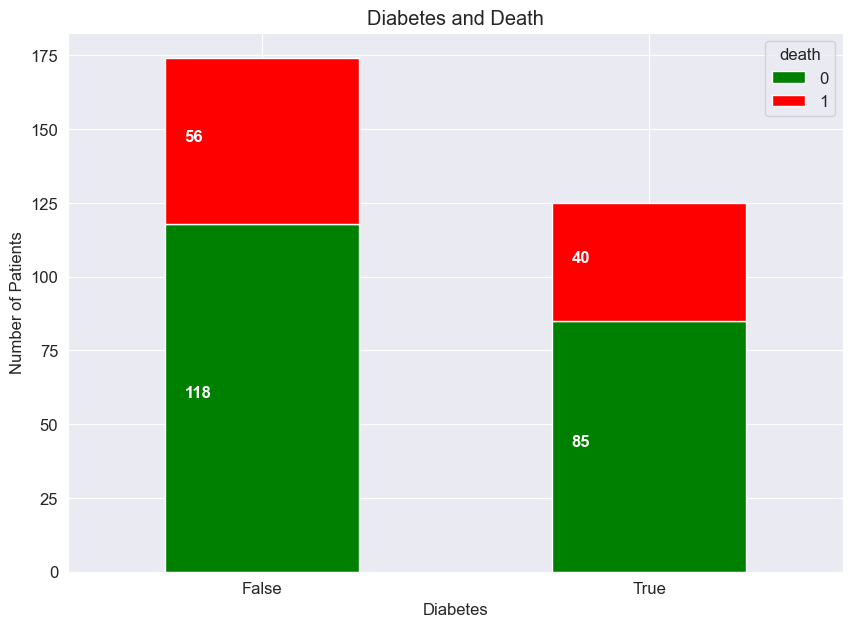

In [497]:
# Count the number of patients with and without diabetes
counts = df.groupby(["diabetes", "death"])["death"].count().unstack()

# Create a stacked bar chart of the counts
ax = counts.plot(kind="bar", stacked=True, color=["green", "red"])

# Add axis labels and title
plt.xticks([0, 1], ["False", "True"], rotation=0)
plt.xlabel("Diabetes")
plt.ylabel("Number of Patients")
plt.title("Diabetes and Death")
for i, v1 in enumerate(counts.iloc[:, 0]):
    ax.text(i - 0.2, v1 / 2, str(v1), color='white', fontweight='bold')
    ax.text(i - 0.2, v1 + counts.iloc[i, 1] / 2, str(counts.iloc[i, 1]), color='white', fontweight='bold')
plt.show()

- The same plot (for high blood pressure) can be created here with `diabetes`. Interestingly, the ratio here in both cases are approximately the same, at around __32%__. So in my opinion, in order to predict the chance of getting heart disease, we should use more aspects than just the `diabetes`.

- _Box plot_

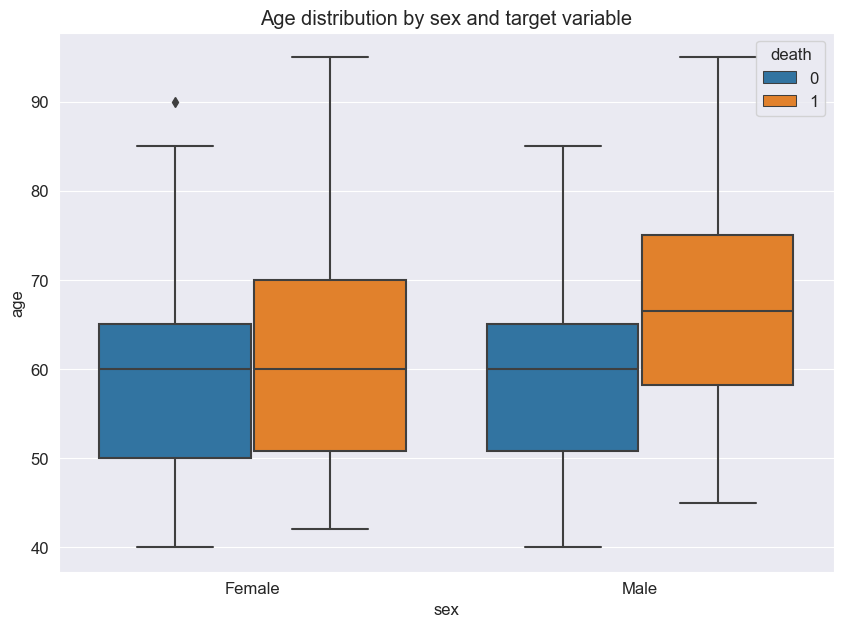

In [498]:
sns.boxplot(data=df, x='sex', y='age', hue='death')
plt.xticks([0,1],['Female','Male'])
plt.title('Age distribution by sex and target variable')
plt.show()

- The box plot shows that the average male patients had heart disease are older than `death` female patients. 

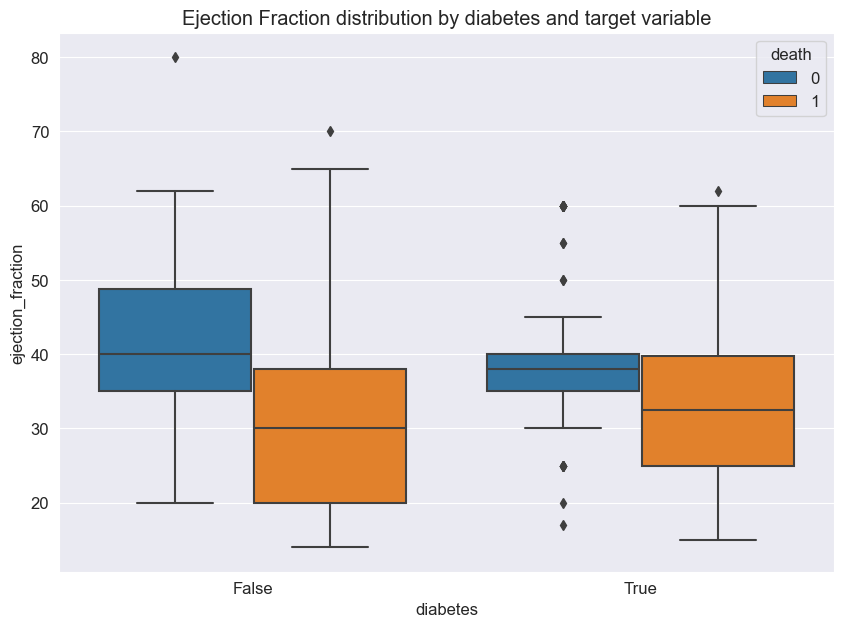

In [499]:
sns.boxplot(data=df, x='diabetes', y='ejection_fraction', hue='death')
plt.xticks([0,1],['False','True'])
plt.title('Ejection Fraction distribution by diabetes and target variable')
plt.show()

- _Countplot_

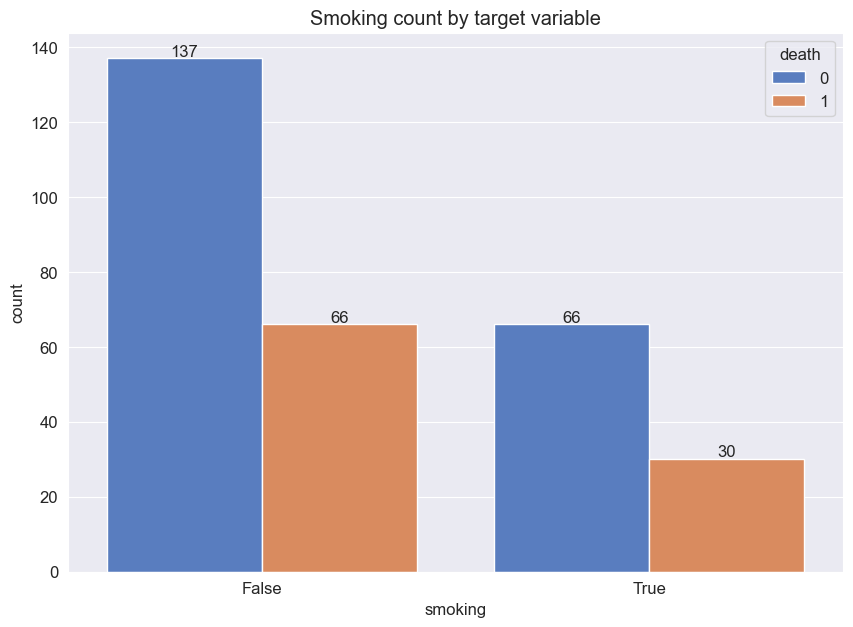

In [500]:
# sns.countplot(data=df, x='smoking', hue='death')
# plt.xticks([0,1],['False','True'])
# plt.title('Smoking count by target variable')
# plt.show()

# fig, ax = plt.subplots()

ax = sns.countplot(data=df, x='smoking', hue='death', palette='muted')
plt.xticks([0,1],['False','True'])
plt.title('Smoking count by target variable')

# Adding counts on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- From the count plot, we can see that among non-smoking patients, 66/(66+137) = 32% are `death`. The percentage for smoking patients is 30/(30+66) = 31%, so approximately the same. We may need more variables to determine the chance of death, not just the smoking status.

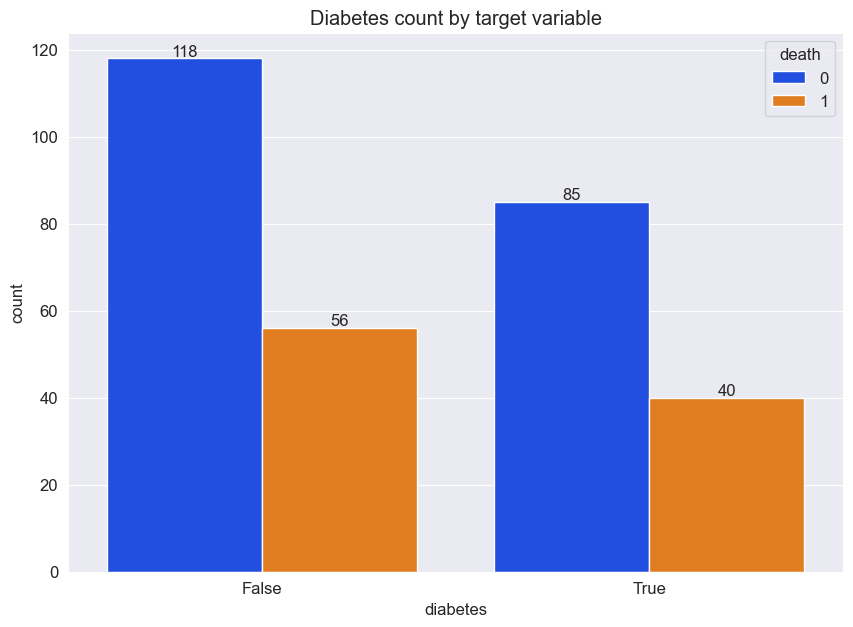

In [501]:
ax = sns.countplot(data=df, x='diabetes', hue='death', palette='bright')
plt.xticks([0,1],['False','True'])
plt.title('Diabetes count by target variable')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- From the count plot, we can see that among non-diabetes patients, 56/(56+118) = 32% are `death`. The percentage for diabetes patients is 40/(40+85) = 32%, so approximately the same. Therefore, we also need more variables to determine the chance of death.

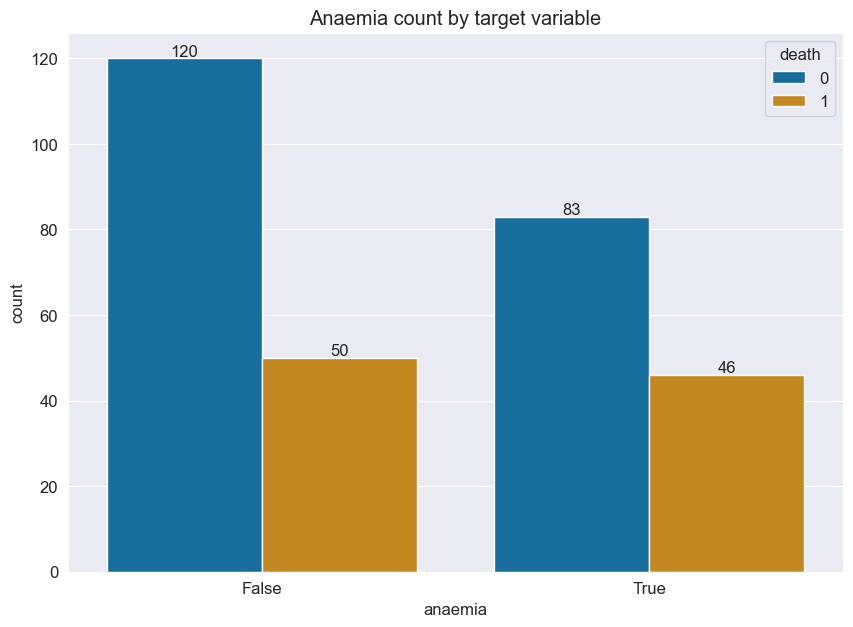

In [502]:
ax = sns.countplot(data=df, x='anaemia', hue='death', palette='colorblind')
plt.xticks([0,1],['False','True'])
plt.title('Anaemia count by target variable')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- The slight difference happens here when we compare the ratios based on the `anaemia` variable. If the patients have anaemia (decrease of red blood cells or hemoglobin), there is a bigger chance that the patient will have heart disease.

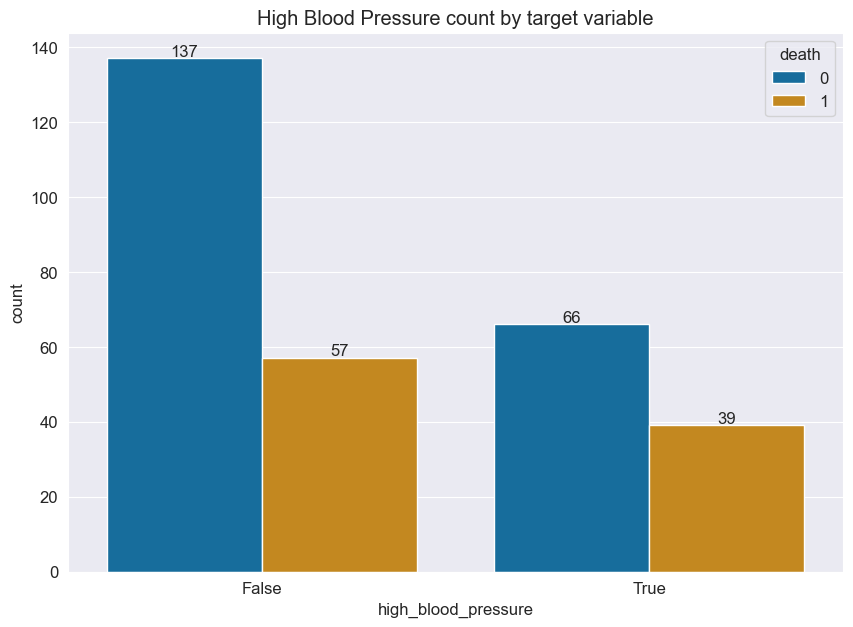

In [503]:
ax = sns.countplot(data=df, x='high_blood_pressure', hue='death', palette='colorblind')
plt.xticks([0,1],['False','True'])
plt.title('High Blood Pressure count by target variable')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(format(height), (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

- Here, we can clearly see that if patients had high blood pressure, it's likely that the patients will have the heart disease. So we can keep in mind that this `high_blood_pressure` is an important variable to predict the chance of getting heart disease and death.

- _Violin plot_

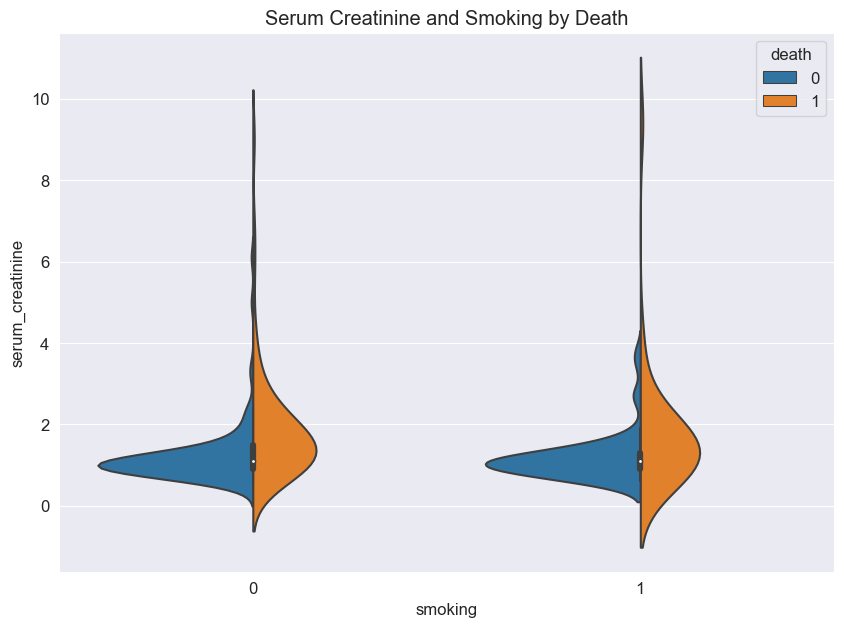

In [504]:
sns.violinplot(data=df, x='smoking', y='serum_creatinine', hue='death', split=True)
plt.title('Serum Creatinine and Smoking by Death')
plt.show()

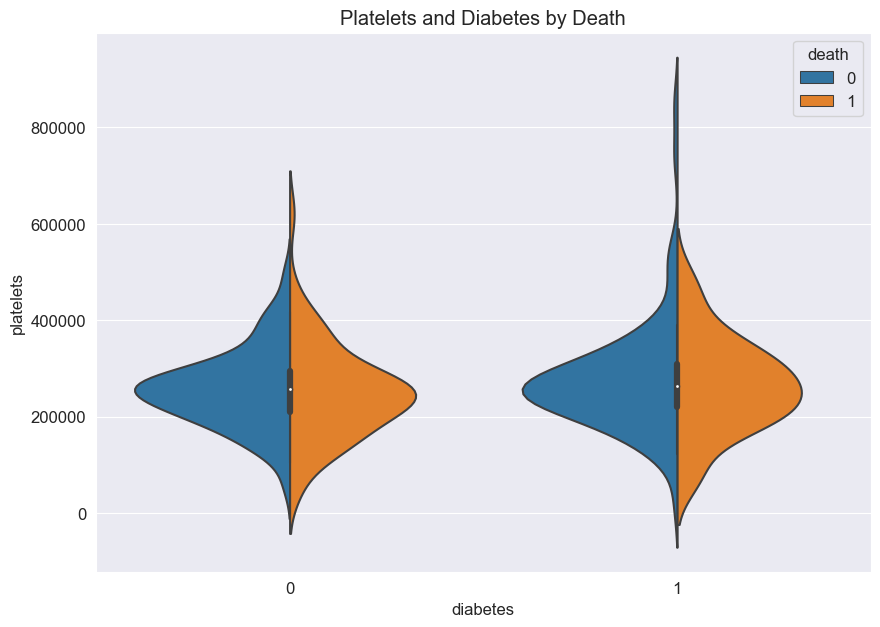

In [505]:
sns.violinplot(data=df, x='diabetes', y='platelets', hue='death', split=True)
plt.title('Platelets and Diabetes by Death')
plt.show()

- We don't see much difference here among the charts above, so smoking and diabetes are not really a key variable, but should be used in addition to the other variables, to predict the target variable.

__Q2:__ Was there anything interesting you learned from your plots? If so, what?

- From my previous plots, I can see that if we just plot the graphs to show the distribution, relationships between one or two independent variables along with the target variable, we can rarely see the significant difference between the ration of `death` and `not-death` patients. Therefore, I believe that we need to use a larger set of independent variables to predict the chance of `death`.

__Q3:__ Is there anything the data did not tell you that you expected to see?

- As I said above, for some plots I expected to see the significant and obvious differences between the ratios of `death` patients. For example, if we use high blood pressure or diabetes variables, we don't see much difference (in terms of ratio) between __with__ or __without__ high blood pressure or diabetes.

### Part 2: Logistic Regression

Since you've had ample experience using Sci-Kit Learn's different functions, you probably recognize by now that almost all of Sci-Kit Learn's classification and regression methods have the same basic structure of 'fit' then 'predict' and maybe some extra functions based on the type of model used (like residuals or coefficients for linear regression). So, for this part, you will be largely on your own, with less detailed instructions. If you have any questions, check out your previous labs, the lecture notes, or the just google the specific function to see how to use it.

First, let's scale and then split the data. You choose what test_size to use. For the scalar, we know that most of our features do not follow a normal distribution (as most are categorical variables), so we will use the MinMaxScaler(). Create the following:

- train_x    (pandas df)
- test_x     (pandas df)    
- train_y    (array)
- test_y     (array)

In [506]:
### Put code here to mimic the below output
X=df.drop('death', axis=1)
y=df['death']

mm_scaler = MinMaxScaler()

X_mm = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

train_x, test_x, train_y, test_y = train_test_split(X_mm, y, test_size=0.2)

train_x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
186,0.181818,0.0,0.071319,0.0,0.545455,0.0,0.155049,0.011236,0.600000,0.0,0.0,0.597865
79,0.272727,0.0,0.039934,0.0,0.469697,1.0,0.362347,0.044944,0.771429,0.0,0.0,0.249110
121,0.472727,1.0,0.005741,1.0,0.363636,1.0,0.165960,0.056180,0.657143,0.0,0.0,0.323843
106,0.272727,0.0,0.092498,0.0,0.469697,0.0,0.288399,0.089888,0.685714,1.0,0.0,0.298932
214,0.454545,1.0,0.014289,0.0,0.318182,1.0,0.321130,0.033708,0.600000,1.0,0.0,0.676157


Create a Logistic Regression Model and output the accuracy on the training and testing set

In [507]:
### Put code here to mimic the below output
model = LogisticRegression()

model.fit(train_x, train_y)

LogisticRegression()

In [508]:
pred_train = model.predict(train_x)

print("Training Accuracy")
print(accuracy_score(train_y, pred_train))

Training Accuracy
0.8451882845188284


In [509]:
pred = model.predict(test_x)

print("Testing Accuracy")
print(accuracy_score(test_y, pred))

Testing Accuracy
0.8333333333333334


__Q4:__ What interval are the outputs of a logistic regression model contained in?

- The outputs of a logistic regression model are contained in the interval [0, 1]. The predicted probability is then compared with a threshold (for example 0.5) to classify the data into one of the two classes. These outputs represent the predicted probabilities of the binary outcome variable.

__Q5:__ How does a Logistic Regression model classify data in a binary way?

- Logistic Regression model uses a sigmoid function to predict the probability of a binary outcome. The outcome could be only two possible classes (like Yes or No, True or False).

Create a confusion matrix for the testing data.

Add ```plt.grid(b=None)``` after your code if you get gridlines

[[37  3]
 [ 7 13]]


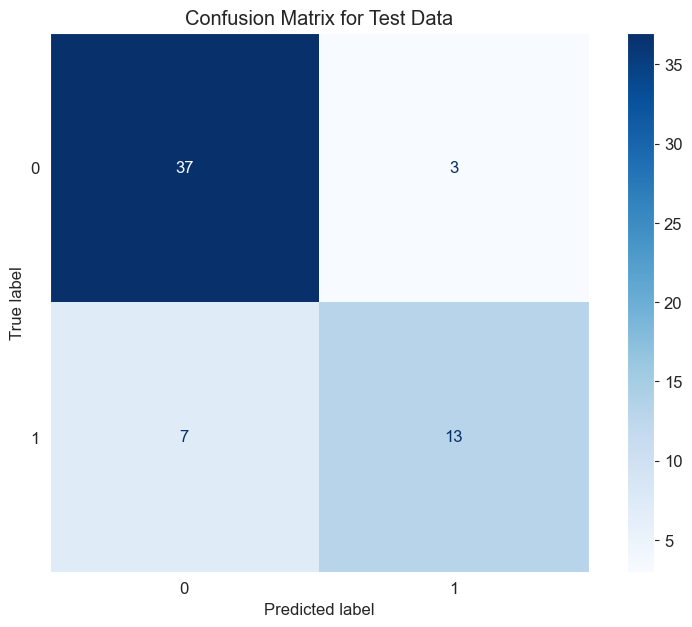

In [510]:
### Put code here to mimic the below output
cm = confusion_matrix(test_y, pred)
print(cm)

# plot confusion matrix
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot(cmap='Blues')
plt.title('Confusion Matrix for Test Data')
plt.grid(b=None)
plt.show()

Print the recall

In [511]:
### Put code here to mimic the below output
print(recall_score(test_y, pred))

0.65


__Q6:__ What does the recall represent (Don't just tell me the formula)?

- Recall is the ratio of true positives to the total actual positive cases. It measures the model's ability to correctly identify positive cases.

Print the precision

In [512]:
### Put code here to mimic the below output
print(precision_score(test_y, pred))

0.8125


__Q7:__ What does the precision represent (Don't just tell me the formula)?

- It measures the fraction of correct positive predictions out of total positive predictions made. It represents the accuracy of the positive predictions made by the model. It shows that out of all the predicted positive outcomes, how many were correct (actually positive).

__Q8:__ Which types of errors would be more costly for this problem, False Positives or False Negatives? Why?

- For this problem, I believe that False Negative would be more costly than False Positive. As we can see, predicting a patient as not having heart disease when they actually have heart disease (FN) would be more costly than predicting a patient as having heart disease when they actually don't (FP). Because FN can cause late or missed treatments, which can lead to a very serious consequence for the patient (they can die). On the other hand, FP can result in unnecessary treatments, which may cause discomfort or side effects, but is less harmful than "forget" the actual patients with heart disease.

Now, let's plot the predictions to try and get an idea of how our model performed. Plot the probability predictions of class label 1 (death), not the classification.

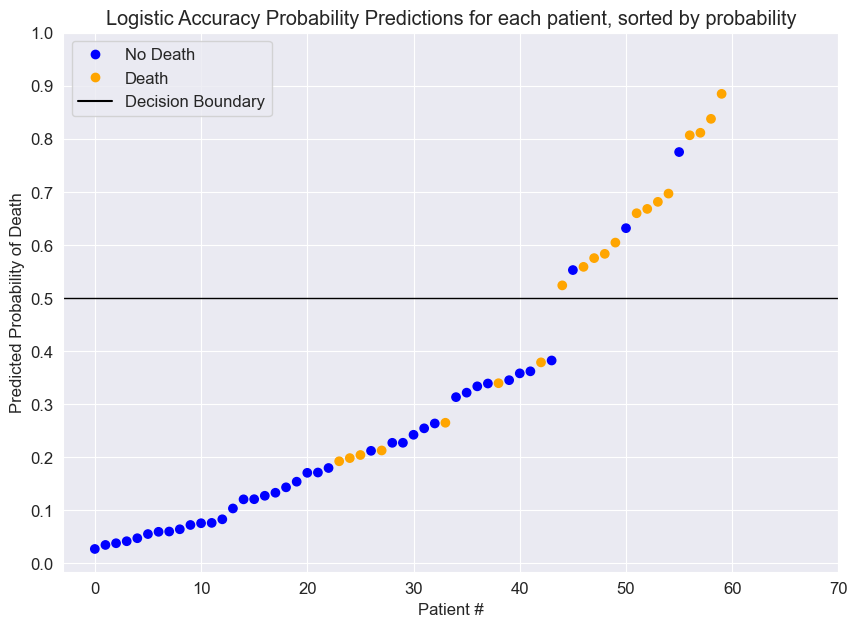

In [513]:
### Put code here to mimic the below output

# Predict probabilities of death (class label 1) 
pred_label_1 = model.predict_proba(test_x)[:, 1]

# create data frame with probability, predictions and actual
data = pd.DataFrame(data = pred_label_1, columns=['probability'])
data['predictions'] = pred
data['actual'] = np.array(test_y)
data = data.sort_values(by=['probability'])

# set colors based on true values
colors = np.where((data['actual']==1), 'orange', 'blue')

# plot patients predictions
plt.scatter(range(len(data['predictions'])), data['probability'], color=colors)

# plot decision boundary
plt.axhline(0.5, color='k', linestyle='-', linewidth=1)

# add legend
plt.plot([], [], color='blue', marker='o', linestyle='None', label='No Death')
plt.plot([], [], color='orange', marker='o', linestyle='None', label='Death')
plt.plot([], [], 'k-', label='Decision Boundary')
plt.legend()

plt.title('Logistic Accuracy Probability Predictions for each patient, sorted by probability')
plt.xlabel('Patient #')
plt.ylabel('Predicted Probability of Death')
plt.xticks(np.arange(0, 80, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

__Q9:__ Does this plot tell us anything interesting about our model? How well does it classify the data?

- We can see that there is a general trend of points above the decision boundary having predicted probabilities of Death, and points below the boundary having probabilities of No-Death. However, there are also some points that are misclassified, with some points above the boundary having the predicted probabilities of No Death and some points below the boundary having the predicted probabilities of Death.
- Overall, the plot suggests that the model is somewhat effective at classifying the data, but we can still improve it.

Create a data frame of the coefficients of the model

In [514]:
### Put code here to mimic the below output

# Get the feature names
features = train_x.columns.tolist()

# Get the coefficients of the logistic regression model
coefs = model.coef_[0]

# Create a data frame of the coefficients and their corresponding features
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefs})

print(coef_df)

                     Feature  Coefficient
0                        age     1.537654
1                    anaemia     0.085184
2   creatinine_phosphokinase     0.602601
3                   diabetes    -0.025622
4          ejection_fraction    -2.170847
5        high_blood_pressure     0.256301
6                  platelets    -0.216118
7           serum_creatinine     1.701200
8               serum_sodium    -0.841257
9                        sex    -0.238674
10                   smoking     0.078223
11                      time    -3.449410


__Q10:__ What do these coefficients mean? How are they calculated?

- The coefficients represent the log odds of the dependent variable given a one-unit change in the independent variable. The coefficients are estimated using the maximum likelihood estimation method, which estimates the parameters that maximize the likelihood of observing the given data. These coefficients are used to calculate the predicted log odds for each observation in the data, which are then converted to predicted probabilities using the logistic function.

__Q11__: Based on that, which features are important to the model?

- Based on the coefficients data frame, we can find that there are a few features that are important to the model:
    - time (coefficient = -3.798643)
    - ejection_fraction (coefficient = -1.926363)
    - serum_creatinine (coefficient = 1.907049)
    - age (coefficient = 1.311658)

Do any other analysis you see fit, whether exploring the data more, assessing the model more intensely, etc.

In [515]:
# X=df.drop('death', axis=1)
# y=df['death']

# mm_scaler = MinMaxScaler()

# X_mm = pd.DataFrame(mm_scaler.fit_transform(X), columns=X.columns)

train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(X_mm, y, test_size=0.2, stratify=y)

train_x_1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
281,0.545455,0.0,0.071319,0.0,0.393939,0.0,0.031398,0.247191,0.657143,1.0,1.0,0.875445
31,0.818182,0.0,0.000000,0.0,0.469697,0.0,0.405989,0.280899,0.542857,1.0,0.0,0.085409
201,0.090909,0.0,0.036361,1.0,0.696970,1.0,0.426597,0.056180,0.657143,1.0,0.0,0.647687
89,0.309091,1.0,0.011738,0.0,0.166667,1.0,0.188993,0.067416,0.885714,1.0,0.0,0.266904
131,0.363636,1.0,0.135111,1.0,0.469697,0.0,0.272639,0.629213,0.514286,1.0,0.0,0.366548


In [516]:
model_1 = LogisticRegression(max_iter=1000)

model_1.fit(train_x_1, train_y_1)

LogisticRegression(max_iter=1000)

In [517]:
pred_1 = model_1.predict(test_x_1)

print("Testing Accuracy")
print(accuracy_score(test_y_1, pred_1))

Testing Accuracy
0.7833333333333333


In [518]:
cm1 = confusion_matrix(test_y_1, pred_1)
print(cm1)

[[37  4]
 [ 9 10]]


In [519]:
print("Recall: ", recall_score(test_y_1, pred_1))

Recall:  0.5263157894736842


In [520]:
print("Precision: ", precision_score(test_y_1, pred_1))

Precision:  0.7142857142857143


Finally, write your final report about your conclusions. Remember, you should write 1 - 2 paragraphs about what you did, why you did it, and what it means for the stakeholder. I _don't_ just want a summary of the work you did. I know what you did. I want to know what the analysis told you about the data. 

In this project, we analyzed a heart disease dataset to build a logistic regression model to predict the likelihood of death. Our model turned out to be pretty good at classifying data and predicting the outcome. Our analysis showed that some features, such as age, serum_creatinine, and ejection_fraction, were strongly associated with the likelihood of death in heart disease patients. However, the other variables such as high_blood_pressure or diabetes also play an important role in predicting the chance of death for patients.

We tried to modify the model a bit to improve its performance. We added `stratify=y` when splitting the dataset in order to ensure that the proportion of classes in the target variable y is the same in both the training and testing datasets, since in the dataset, one class is more prevalent than the other (non-death compared to death). This model provided a better performance, with higher accuracy, recall and precision. Overall, our analysis provides insights into the factors that may contribute to mortality in heart disease patients and can aid healthcare professionals in identifying patients who are at a higher risk of death.